In [1]:
import MuMoT as mmt

Created `%%model` as an alias for `%%latex`.


In [2]:
%%model
$
U -> A : g_1
U -> B : g_2
A -> U : a_1
B -> U : a_2
A + U -> A + A : r_1
B + U -> B + B : r_2
A + B -> A + U : s
A + B -> B + U : s
$

<IPython.core.display.Latex object>

In [3]:
model1 = mmt.parseModel(In[2])

In [4]:
model2 = model1.substitute('a_1 = 1/v_1, a_2 = 1/v_2, g_1 = v_1, g_2 = v_2, r_1 = v_1, r_2 = v_2')

In [5]:
model3 = model2.substitute('v_1 = \\mu + \\Delta/2, v_2 = \\mu - \\Delta/2')

In [6]:
model3.showODEs()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [7]:
model3.show()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [8]:
model4 = model3.substitute('U = N - \A - \B')

In [9]:
model4.showODEs()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

bar<ipywidgets.widgets.widget_string.HTML object at 0x10c172c18>


<IPython.core.display.Javascript object>


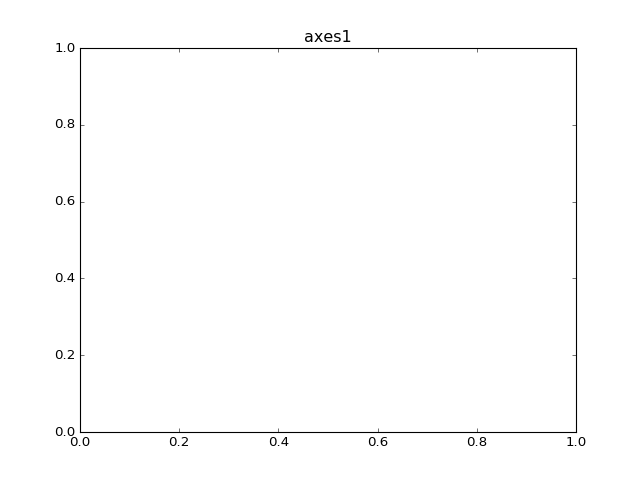

In [10]:
modelBifCont1 = model4.bifurcation('s','A')

In [11]:
#soloView0 = mmt.MuMoTbifurcationView(model4, None, None, 's', 'A', None, params = [('\mu', 1), ('v', 2), ('\Delta', 0)])

In [12]:
model5 = model2.substitute('v_1 = v, v_2 = v')

In [13]:
model6 = model5.substitute('U = N - \A - \B')

In [14]:
model6.showODEs()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

bar<ipywidgets.widgets.widget_string.HTML object at 0x10c4695c0>


<IPython.core.display.Javascript object>


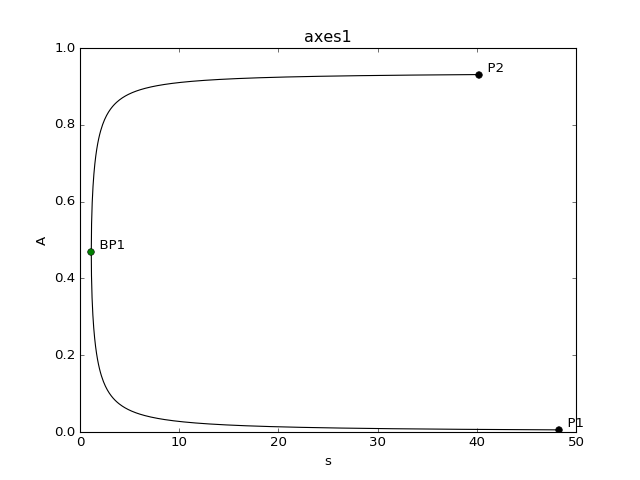

In [15]:
modelBifCont2 = model6.bifurcation('s','A')

In [16]:
modelBifCont1.showLogs()

Starting bifurcation analysis with parameters (Delta=4), (mu=4), at 2017-09-20 16:42:59.628853
Not converged:  [-0.2561893   1.41900605  4.8772811 ] 



//anaconda/lib/python3.5/site-packages/scipy/optimize/minpack.py:236: RuntimeWarning: The number of calls to function has reached maxfev = 1400.
  warnings.warn(msg, RuntimeWarning)


bar<ipywidgets.widgets.widget_string.HTML object at 0x10c6a0e80>


<IPython.core.display.Javascript object>


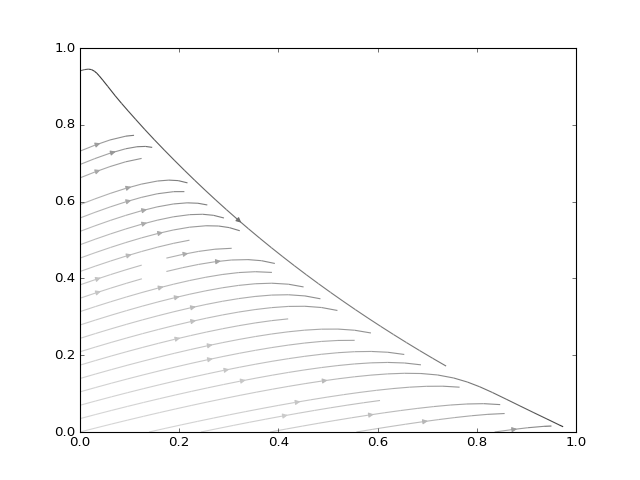

In [17]:
modelStreamCont1 = model4.stream('A', 'B')

In [18]:
modelStreamCont1.showLogs()

Starting 2d stream plot with parameters (s=10.0), (Delta=10.0), (mu=10.0), at 2017-09-20 16:43:09.705204


bar<ipywidgets.widgets.widget_string.HTML object at 0x10cd21e10>


<IPython.core.display.Javascript object>


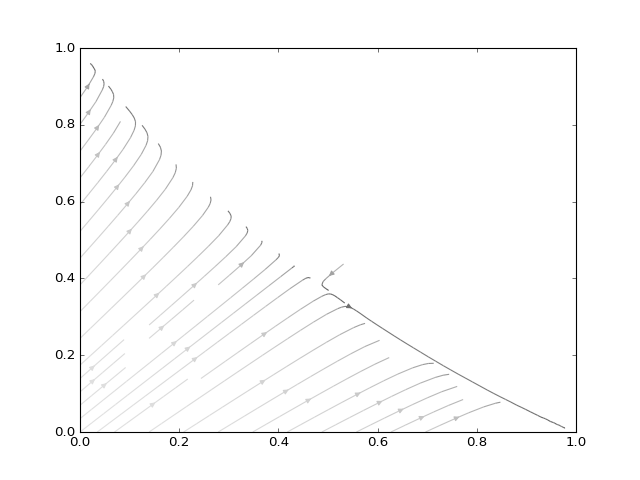

In [19]:
modelStreamCont2 = model6.stream('A', 'B')

In [20]:
modelStreamCont2.showLogs()

Starting 2d stream plot with parameters (v=10.0), (s=10.0), at 2017-09-20 16:43:10.180092


bar<ipywidgets.widgets.widget_string.HTML object at 0x10ce05978>


<IPython.core.display.Javascript object>


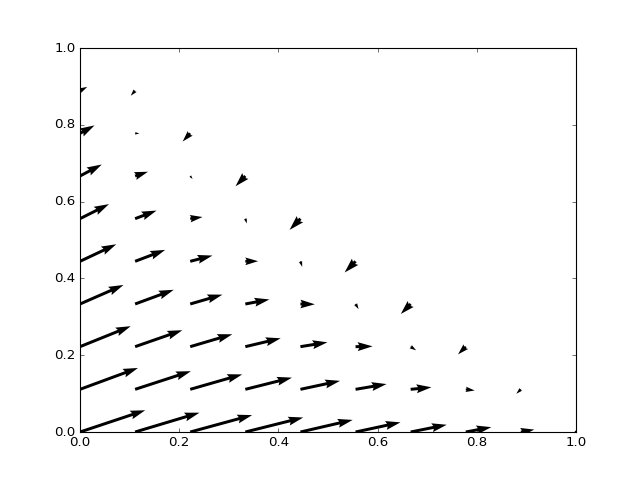

In [21]:
modelVectorCont1 = model4.vector('A', 'B')

In [22]:
modelVectorCont1.showLogs()

Starting 2d vector plot with parameters (s=10.0), (Delta=10.0), (mu=10.0), at 2017-09-20 16:43:10.755620


In [23]:
%%model
$
U -> A : g_1
U -> B : g_2
U -> C : g_3
A -> U : a_1
B -> U : a_2
C -> U : a_3
A + U -> A + A : r_1
B + U -> B + B : r_2
C + U -> C + C : r_3
A + B -> A + U : s
A + B -> B + U : s
A + C -> A + U : s
A + C -> C + U : s
B + C -> B + U : s
B + C -> C + U : s
$

<IPython.core.display.Latex object>

In [24]:
model7 = mmt.parseModel(In[23])

In [25]:
model8 = model7.substitute('U = N - A - B - C')

bar<ipywidgets.widgets.widget_string.HTML object at 0x10d0bd940>


<IPython.core.display.Javascript object>


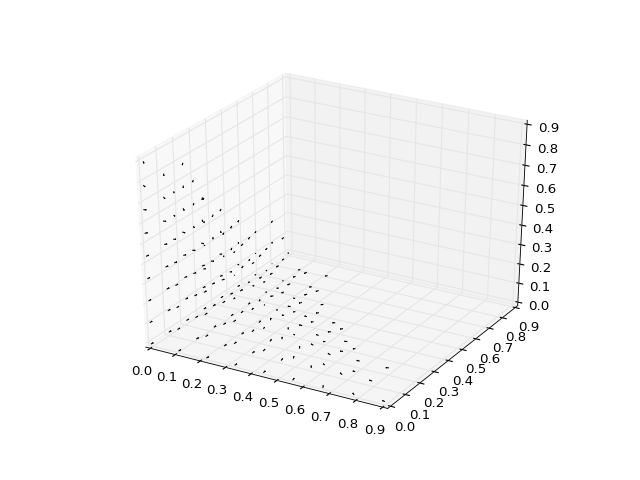

In [26]:
modelVectorCont2 = model8.vector('A', 'B', 'C')

In [27]:
modelVectorCont2.showLogs()

Starting 3d vector plot with parameters (g_{3}=10.0), (r_{1}=10.0), (g_{2}=10.0), (r_{2}=10.0), (a_{2}=10.0), (a_{3}=10.0), (s=10.0), (g_{1}=10.0), (r_{3}=10.0), (a_{1}=10.0), at 2017-09-20 16:43:11.111935


In [28]:
#model4._get_solutions()

<IPython.core.display.Javascript object>


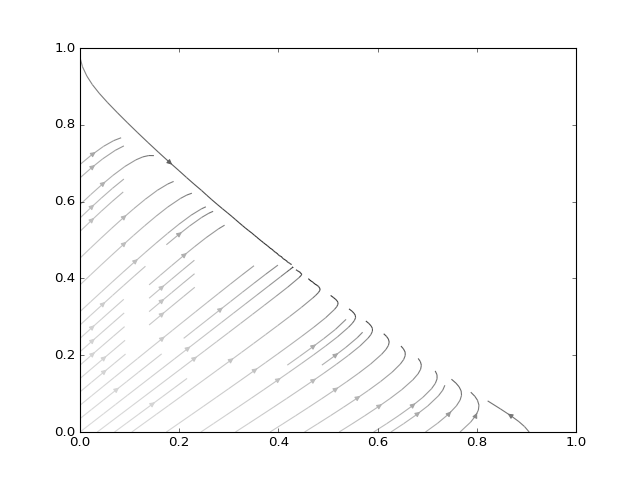

In [29]:
soloView1 = mmt.MuMoTstreamView(model6, None, 'A', 'B', params = [('s', 1), ('v', 2)])

In [30]:
model9 = model8.substitute('a_1 = a, a_2 = a, a_3 = a, g_1 = g, g_2 = g, g_3 = g, r_1 = r, r_2 = r, r_3 = 3')

<IPython.core.display.Javascript object>


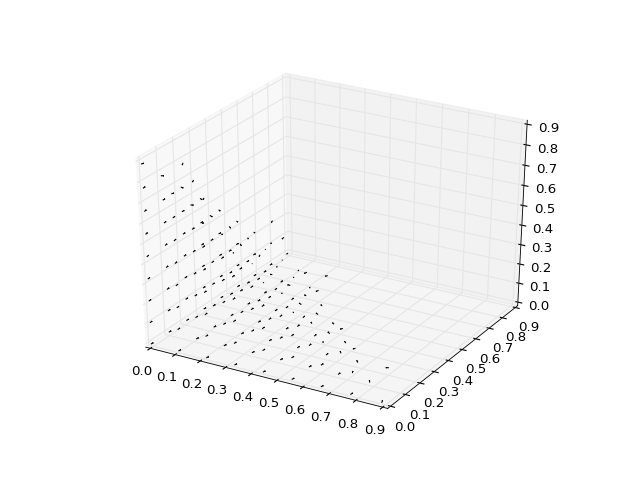

In [31]:
soloView2 = mmt.MuMoTvectorView(model9, None, 'A', 'B', 'C', params = [('s', 1), ('a', 1/2), ('r', 2), ('g', 2)])

bar<ipywidgets.widgets.widget_string.HTML object at 0x10d4db278>


<IPython.core.display.Javascript object>


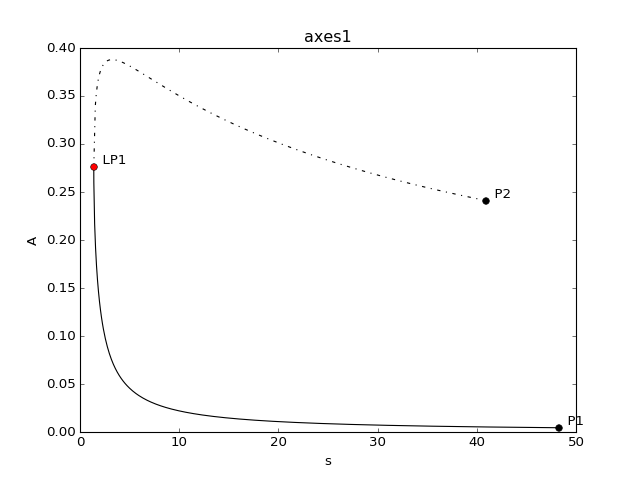

In [32]:
multiController1 = mmt.MuMoTmultiController([model4.stream('A', 'B', silent = True), model4.vector('A', 'B', silent = True)], shareAxes = True)

In [33]:
multiController1.showLogs()

Starting 2d stream plot with parameters (Delta=10.0), (mu=10.0), (s=10.0), at 2017-09-20 16:43:12.378106
Starting 2d vector plot with parameters (Delta=10.0), (mu=10.0), (s=10.0), at 2017-09-20 16:43:12.855954


bar<ipywidgets.widgets.widget_string.HTML object at 0x10d905748>


<IPython.core.display.Javascript object>


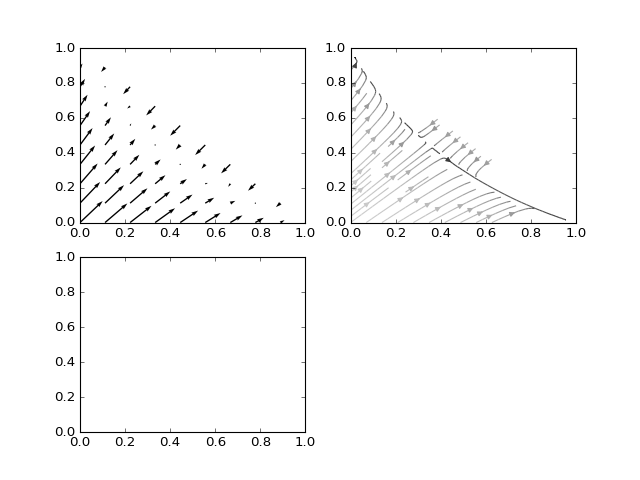

In [34]:
#multiController2 = mmt.MuMoTmultiController([model4.vector('A', 'B', silent = True), model4.stream('A', 'B', silent = True)])
multiController2 = mmt.MuMoTmultiController([model4.vector('A', 'B', silent = True), model4.stream('A', 'B', silent = True), model4.bifurcation('s', 'A', silent = True)])

In [39]:
multiController2.showLogs()

Starting 2d vector plot with parameters (Delta=4), (mu=4), (s=10.0), at 2017-09-20 16:43:17.822992
Starting 2d stream plot with parameters (Delta=4.0), (mu=4.0), (s=10.0), at 2017-09-20 16:43:17.862490
Starting bifurcation analysis with parameters (Delta=4.0), (mu=4.0), (s=10.0), at 2017-09-20 16:43:18.349348
Not converged:  [-0.2561893   1.41900605  4.8772811 ] 



//anaconda/lib/python3.5/site-packages/scipy/optimize/minpack.py:236: RuntimeWarning: The number of calls to function has reached maxfev = 1400.
  warnings.warn(msg, RuntimeWarning)


Starting 2d vector plot with parameters (Delta=4.0), (mu=4.0), (s=10.0), at 2017-09-20 16:43:44.720430
Starting 2d stream plot with parameters (Delta=0.3), (mu=4.0), (s=10.0), at 2017-09-20 16:43:44.760362
Starting bifurcation analysis with parameters (Delta=0.3), (mu=4.0), (s=10.0), at 2017-09-20 16:43:45.386663
LP Point found 
Starting 2d vector plot with parameters (Delta=0.3), (mu=4.0), (s=10.0), at 2017-09-20 16:44:12.566513
Starting 2d stream plot with parameters (Delta=0.3), (mu=5.6), (s=10.0), at 2017-09-20 16:44:12.608432
Starting bifurcation analysis with parameters (Delta=0.3), (mu=5.6), (s=10.0), at 2017-09-20 16:44:13.148108
LP Point found 


In [36]:
multiController3 = mmt.MuMoTmultiController([model4.stream('A', 'B', silent = True), model4.vector('A', 'B', silent = True)], shareAxes = True, silent = True)

bar<ipywidgets.widgets.widget_string.HTML object at 0x10dcdada0>


<IPython.core.display.Javascript object>


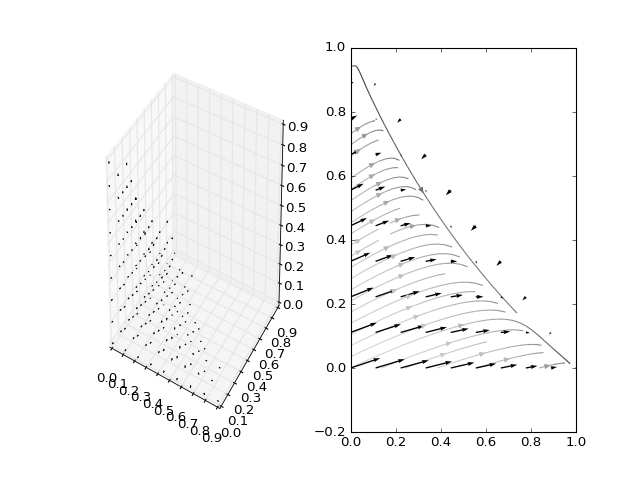

In [37]:
multiController4 = mmt.MuMoTmultiController([model9.vector('A', 'B', 'C', silent = True), multiController3])

In [38]:
multiController4.showLogs()

Starting 3d vector plot with parameters (r=10.0), (Delta=10.0), (g=10.0), (a=10.0), (mu=10.0), (s=10.0), at 2017-09-20 16:43:23.913364
Starting 2d stream plot with parameters (r=10.0), (Delta=10.0), (g=10.0), (a=10.0), (mu=10.0), (s=10.0), at 2017-09-20 16:43:23.961719
Starting 2d vector plot with parameters (r=10.0), (Delta=10.0), (g=10.0), (a=10.0), (mu=10.0), (s=10.0), at 2017-09-20 16:43:24.333824
